In [1]:
import os
import glob
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec
import cartopy.crs as ccrs
import cartopy.feature
import seaborn as sns

import wrf
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.colors

In [2]:
###############################################################
# CHARGE ATMOS variables
###############################################################

#Parameters
folder_mod = '/capstor/scratch/cscs/gsergi/OUTPUT_PGW_20220315/ANT_20220315_'
domain = 'd01'
acc_t = 1440 #minutes
ini_date_idx=0
#end_date_idx=0

###load data###
outhist_files = '/outhist/outhist_'+domain+'_*'# Load netcdf

#hist
print('Charging Ant hist...')
wrflist_oh = []
proj = 'hist'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))
    
# Extract the pressure, geopotential height, and wind variables
Ppertubation_ant_hist = wrf.getvar(wrflist_oh, 'P', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
PB_ant_hist = wrf.getvar(wrflist_oh, 'PB', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
P_ant_hist = (Ppertubation_ant_hist + PB_ant_hist)

PHperturbation_ant_hist = wrf.getvar(wrflist_oh, 'PH', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
PHB_ant_hist = wrf.getvar(wrflist_oh, 'PHB', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
Z_ant_hist = (PHperturbation_ant_hist + PHB_ant_hist)/9.8
Z_ant_hist_unstg = wrf.destagger(Z_ant_hist, stagger_dim=1)

PT_ant_hist = wrf.getvar(wrflist_oh, 'T', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:] + 300
T_ant_hist = PT_ant_hist * (P_ant_hist/100000)**0.286

U_ant_hist = wrf.getvar(wrflist_oh, 'U', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
V_ant_hist = wrf.getvar(wrflist_oh, 'V', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
#Wind_ant_hist = np.squrt(U_ant_hist**2 + V_ant_hist**2)

# Get plt variables
qvapor_ant_hist = wrf.getvar(wrflist_oh, 'QVAPOR', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qcloud_ant_hist = wrf.getvar(wrflist_oh, 'QCLOUD', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qice_ant_hist = wrf.getvar(wrflist_oh, 'QICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qrain_ant_hist = wrf.getvar(wrflist_oh, 'QRAIN', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qsnow_ant_hist = wrf.getvar(wrflist_oh, 'QSNOW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qice_ant_hist = wrf.getvar(wrflist_oh, 'QICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qvapor_50m_hist = qvapor_ant_hist[:,0,:,:]
qcloud_50m_hist = qcloud_ant_hist[:,0,:,:]
qcloud_200m_hist = qcloud_ant_hist[:,9,:,:]
qrain_50m_hist = qrain_ant_hist[:,0,:,:]
qsnow_50m_hist = qsnow_ant_hist[:,0,:,:]
qice_50m_hist = qice_ant_hist[:,0,:,:]

qbs_ant_hist = wrf.getvar(wrflist_oh, 'bs_qi', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qbs_50m_hist = qbs_ant_hist[:, 0, :, :]

pw_ant_hist = wrf.pw(P_ant_hist, T_ant_hist, qvapor_ant_hist, Z_ant_hist, meta=True)
lwp_ant_hist = wrf.pw(P_ant_hist, T_ant_hist, qcloud_ant_hist, Z_ant_hist, meta=True)
iwp_ant_hist = wrf.pw(P_ant_hist, T_ant_hist, qice_ant_hist, Z_ant_hist, meta=True)

#ssp245
print('Charging Ant ssp245...')
wrflist_oh = []
proj = 'ssp245_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))
    
# Extract the pressure, geopotential height, and wind variables
Ppertubation_ant_ssp245 = wrf.getvar(wrflist_oh, 'P', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
PB_ant_ssp245 = wrf.getvar(wrflist_oh, 'PB', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
P_ant_ssp245 = (Ppertubation_ant_ssp245 + PB_ant_ssp245)

PHperturbation_ant_ssp245= wrf.getvar(wrflist_oh, 'PH', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
PHB_ant_ssp245 = wrf.getvar(wrflist_oh, 'PHB', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
Z_ant_ssp245 = (PHperturbation_ant_ssp245 + PHB_ant_ssp245)/9.8
Z_ant_ssp245_unstg = wrf.destagger(Z_ant_ssp245, stagger_dim=1)

PT_ant_ssp245 = wrf.getvar(wrflist_oh, 'T', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:] + 300
T_ant_ssp245 = PT_ant_ssp245 * (P_ant_ssp245/100000)**0.286

U_ant_ssp245 = wrf.getvar(wrflist_oh, 'U', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
V_ant_ssp245 = wrf.getvar(wrflist_oh, 'V', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
#Wind_ant_ssp245 = np.squrt(U_ant_ssp245**2 + V_ant_ssp245**2)

# Get plt variables
qvapor_ant_ssp245 = wrf.getvar(wrflist_oh, 'QVAPOR', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qcloud_ant_ssp245 = wrf.getvar(wrflist_oh, 'QCLOUD', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qice_ant_ssp245 = wrf.getvar(wrflist_oh, 'QICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qrain_ant_ssp245 = wrf.getvar(wrflist_oh, 'QRAIN', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qsnow_ant_ssp245 = wrf.getvar(wrflist_oh, 'QSNOW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qice_ant_ssp245 = wrf.getvar(wrflist_oh, 'QICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qvapor_50m_ssp245 = qvapor_ant_ssp245[:,0,:,:]
qcloud_50m_ssp245 = qcloud_ant_ssp245[:,0,:,:]
qcloud_200m_ssp245 = qcloud_ant_ssp245[:,9,:,:]
qrain_50m_ssp245 = qrain_ant_ssp245[:,0,:,:]
qsnow_50m_ssp245 = qsnow_ant_ssp245[:,0,:,:]
qice_50m_ssp245 = qice_ant_ssp245[:,0,:,:]

qbs_ant_ssp245 = wrf.getvar(wrflist_oh, 'bs_qi', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qbs_50m_ssp245 = qbs_ant_ssp245[:, 0, :, :]

pw_ant_ssp245 = wrf.pw(P_ant_ssp245, T_ant_ssp245, qvapor_ant_ssp245, Z_ant_ssp245, meta=True)
lwp_ant_ssp245 = wrf.pw(P_ant_ssp245, T_ant_ssp245, qcloud_ant_ssp245, Z_ant_ssp245, meta=True)
iwp_ant_ssp245 = wrf.pw(P_ant_ssp245, T_ant_ssp245, qice_ant_ssp245, Z_ant_ssp245, meta=True)

#past
print('Charging Ant ssp585...')
wrflist_oh = []
proj = 'ssp585_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))
    
# Extract the pressure, geopotential height, and wind variables
Ppertubation_ant_ssp585 = wrf.getvar(wrflist_oh, 'P', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
PB_ant_ssp585 = wrf.getvar(wrflist_oh, 'PB', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
P_ant_ssp585 = (Ppertubation_ant_ssp585 + PB_ant_ssp585)

PHperturbation_ant_ssp585= wrf.getvar(wrflist_oh, 'PH', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
PHB_ant_ssp585 = wrf.getvar(wrflist_oh, 'PHB', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
Z_ant_ssp585 = (PHperturbation_ant_ssp585 + PHB_ant_ssp585)/9.8
Z_ant_ssp585_unstg = wrf.destagger(Z_ant_ssp585, stagger_dim=1)

PT_ant_ssp585 = wrf.getvar(wrflist_oh, 'T', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:] + 300
T_ant_ssp585 = PT_ant_ssp585 * (P_ant_ssp585/100000)**0.286

U_ant_ssp585 = wrf.getvar(wrflist_oh, 'U', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
V_ant_ssp585 = wrf.getvar(wrflist_oh, 'V', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
#Wind_ant_ssp585 = np.squrt(U_ant_ssp585**2 + V_ant_ssp585**2)

# Get plt variables
qvapor_ant_ssp585 = wrf.getvar(wrflist_oh, 'QVAPOR', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qcloud_ant_ssp585 = wrf.getvar(wrflist_oh, 'QCLOUD', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qice_ant_ssp585 = wrf.getvar(wrflist_oh, 'QICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qrain_ant_ssp585 = wrf.getvar(wrflist_oh, 'QRAIN', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qsnow_ant_ssp585 = wrf.getvar(wrflist_oh, 'QSNOW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qice_ant_ssp585 = wrf.getvar(wrflist_oh, 'QICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qvapor_50m_ssp585 = qvapor_ant_ssp585[:,0,:,:]
qcloud_50m_ssp585 = qcloud_ant_ssp585[:,0,:,:]
qcloud_200m_ssp585 = qcloud_ant_ssp585[:,9,:,:]
qrain_50m_ssp585 = qrain_ant_ssp585[:,0,:,:]
qsnow_50m_ssp585 = qsnow_ant_ssp585[:,0,:,:]
qice_50m_ssp585 = qice_ant_ssp585[:,0,:,:]

qbs_ant_ssp585 = wrf.getvar(wrflist_oh, 'bs_qi', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:,:]
qbs_50m_ssp585 = qbs_ant_ssp585[:, 0, :, :]

pw_ant_ssp585 = wrf.pw(P_ant_ssp585, T_ant_ssp585, qvapor_ant_ssp585, Z_ant_ssp585, meta=True)
lwp_ant_ssp585 = wrf.pw(P_ant_ssp585, T_ant_ssp585, qcloud_ant_ssp585, Z_ant_ssp585, meta=True)
iwp_ant_ssp585 = wrf.pw(P_ant_ssp585, T_ant_ssp585, qice_ant_ssp585, Z_ant_ssp585, meta=True)

######################
# ANT COORDINATES
# Get surface fix variables
height = wrf.getvar(wrflist_oh, 'HGT', timeidx=0, method="cat")[:,:]
# Get dimension
lats, lons = wrf.latlon_coords(qvapor_ant_ssp245)
times = wrf.extract_times(wrflist_oh, timeidx=wrf.ALL_TIMES)


###############################################################
# CHARGE ENERGY variables
###############################################################

#Parameters
folder_mod = '/capstor/scratch/cscs/gsergi/OUTPUT_PGW_20220315/ANT_20220315_'
domain = 'd01'
acc_t = 1440 #minutes
ini_date_idx=0
tini_ix = 39
#end_date_idx=0

###load data###
snpack_files = '/SMB/SMB_'+domain+'_*'# Load netcdf
outhist_files = '/outhist/outhist_'+domain+'_*'# Load netcdf

################
#hist
print('Charging Ant hist...')
wrflist_smb = []
wrflist_out = []
proj = 'hist'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_smb in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_smb.append(netCDF4.Dataset(ncdf_smb))

print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_out in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_out.append(netCDF4.Dataset(ncdf_out))
    
# Get surface variables
sigma = 5.670374419E-8
TSK = wrf.getvar(wrflist_out, 'TSK', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LWINC_hist = wrf.getvar(wrflist_out, 'GLW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LWOUT_hist = -0.98*sigma*TSK**4
E_LWNET_hist = E_LWINC_hist + E_LWOUT_hist
E_SWINC_hist = wrf.getvar(wrflist_out, 'SWDOWN', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_SWNET_hist = wrf.getvar(wrflist_out, 'GSW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_SWOUT_hist = E_SWNET_hist - E_SWINC_hist
E_SENSH_hist = wrf.getvar(wrflist_smb, 'HFX', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LATEH_hist = wrf.getvar(wrflist_smb, 'LH', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_TOTAL_hist = E_LWINC_hist + E_LWOUT_hist + E_SWINC_hist + E_SWOUT_hist - E_SENSH_hist - E_LATEH_hist


################
#past
print('Charging Ant ssp245...')
wrflist_smb = []
wrflist_out = []
proj = 'ssp245_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_smb in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_smb.append(netCDF4.Dataset(ncdf_smb))

print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_out in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_out.append(netCDF4.Dataset(ncdf_out))
    
# Get surface variables
sigma = 5.670374419E-8
TSK = wrf.getvar(wrflist_out, 'TSK', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LWINC_ssp245 = wrf.getvar(wrflist_out, 'GLW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LWOUT_ssp245 = -0.98*sigma*TSK**4
E_LWNET_ssp245 = E_LWINC_ssp245 + E_LWOUT_ssp245
E_SWINC_ssp245 = wrf.getvar(wrflist_out, 'SWDOWN', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_SWNET_ssp245 = wrf.getvar(wrflist_out, 'GSW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_SWOUT_ssp245 = E_SWNET_ssp245 - E_SWINC_ssp245
E_SENSH_ssp245 = wrf.getvar(wrflist_smb, 'HFX', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LATEH_ssp245 = wrf.getvar(wrflist_smb, 'LH', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_TOTAL_ssp245 = E_LWINC_ssp245 + E_LWOUT_ssp245 + E_SWINC_ssp245 + E_SWOUT_ssp245 - E_SENSH_ssp245 - E_LATEH_ssp245

################
#past
print('Charging Ant ssp585...')
wrflist_smb = []
wrflist_out = []
proj = 'ssp585_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_smb in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_smb.append(netCDF4.Dataset(ncdf_smb))

print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_out in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_out.append(netCDF4.Dataset(ncdf_out))
    
# Get surface variables
sigma = 5.670374419E-8
TSK = wrf.getvar(wrflist_out, 'TSK', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LWINC_ssp585 = wrf.getvar(wrflist_out, 'GLW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LWOUT_ssp585 = -0.98*sigma*TSK**4
E_LWNET_ssp585 = E_LWINC_ssp585 + E_LWOUT_ssp585
E_SWINC_ssp585 = wrf.getvar(wrflist_out, 'SWDOWN', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_SWNET_ssp585 = wrf.getvar(wrflist_out, 'GSW', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_SWOUT_ssp585 = E_SWNET_ssp585 - E_SWINC_ssp585
E_SENSH_ssp585 = wrf.getvar(wrflist_smb, 'HFX', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_LATEH_ssp585 = wrf.getvar(wrflist_smb, 'LH', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
E_TOTAL_ssp585 = E_LWINC_ssp585 + E_LWOUT_ssp585 + E_SWINC_ssp585 + E_SWOUT_ssp585 - E_SENSH_ssp585 - E_LATEH_ssp585

######################
# ANT COORDINATES
# Get surface fix variables
height = wrf.getvar(wrflist_smb, 'HGT', timeidx=0, method="cat")[:,:]
# Get dimension
lats, lons = wrf.latlon_coords(E_SENSH_hist)
times = wrf.extract_times(wrflist_smb, timeidx=wrf.ALL_TIMES)

Charging Ant hist...
Total: 59
Charging Ant ssp245...
Total: 59
Charging Ant ssp585...
Total: 59
Charging Ant hist...
Total: 59
Total: 59
Charging Ant ssp245...
Total: 59
Total: 59
Charging Ant ssp585...
Total: 59
Total: 59


In [3]:
#Positions
CON_xy = wrf.ll_to_xy(wrflist_oh, -70.000, 130.000) #Wilkes
CON_ll = wrf.xy_to_ll(wrflist_oh, CON_xy[0], CON_xy[1])

#Times mean
tini = np.where(times == np.datetime64('2022-03-17T00'))[0][0]
tend = np.where(times == np.datetime64('2022-03-20T00'))[0][0]

#Times Timeseries
tiniTS = np.where(times == np.datetime64('2022-03-10T00'))[0][0]
tendTS = np.where(times == np.datetime64('2022-03-25T00'))[0][0]

[]

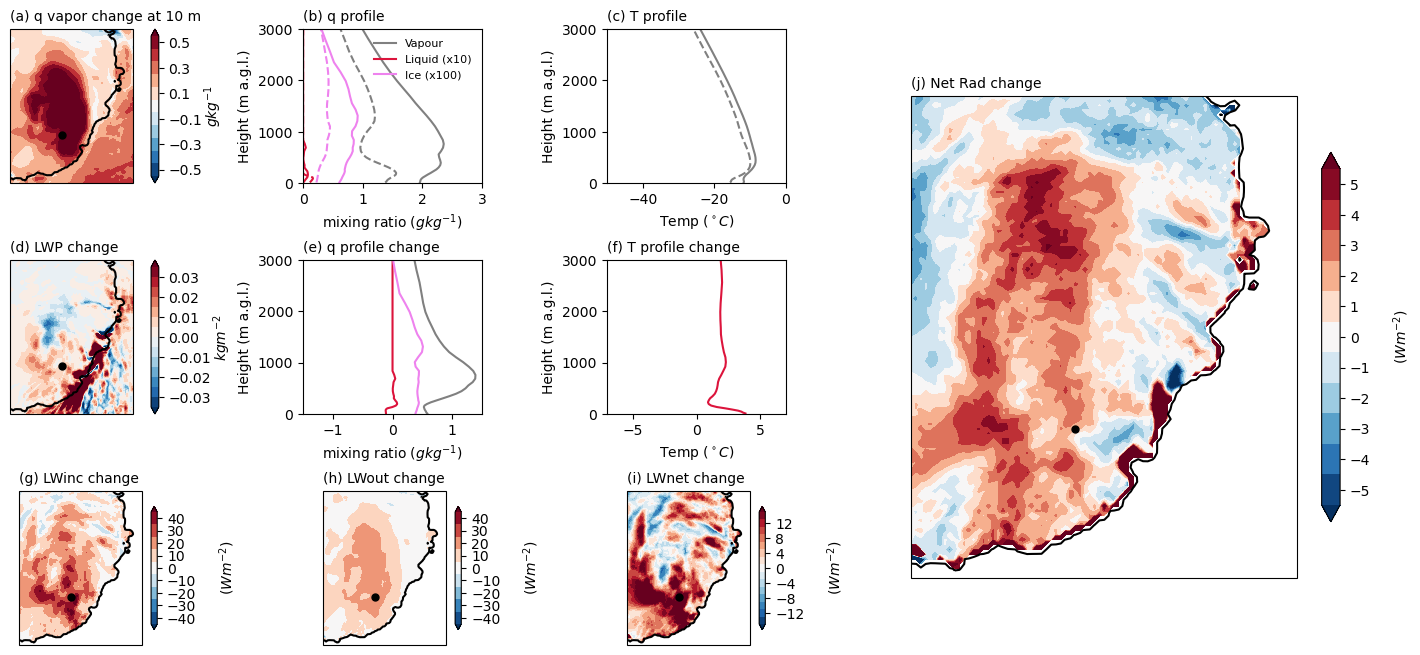

In [4]:
#############################################
# Plot terrein map
#############################################

min_height = 10
#time_ini = 39
time_ix = 0
  
####################
### Plot DRIVERS ###
#Figure and axis
fig = plt.figure(figsize=[18,8])
spec = gridspec.GridSpec(ncols=5, nrows=3, figure=fig, hspace= 0.5, wspace=0.7)

### Background
ax1 = fig.add_subplot(spec[0, 0], projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, 0], projection=ccrs.SouthPolarStereo())
ax5 = fig.add_subplot(spec[1, 1])
ax6 = fig.add_subplot(spec[1, 2])
ax7 = fig.add_subplot(spec[2, 0], projection=ccrs.SouthPolarStereo())
ax8 = fig.add_subplot(spec[2, 1], projection=ccrs.SouthPolarStereo())
ax9 = fig.add_subplot(spec[2, 2], projection=ccrs.SouthPolarStereo())
ax10 = fig.add_subplot(spec[:, 3:], projection=ccrs.SouthPolarStereo())

################################
### Plot Water and Cloud Vapor
### Vapor Map
CS1 = ax1.contourf((wrf.to_np(qvapor_50m_ssp245[tini:tend,:,:].mean(axis=0)) - wrf.to_np(qvapor_50m_hist[tini:tend,:,:].mean(axis=0)))*1000, np.arange(-0.55,0.56,0.1), cmap='RdBu_r', extend="both")
#CS1 = ax1.contourf((wrf.to_np(pw_ant_ssp245[tini:tend,:,:].mean(axis=0)) - wrf.to_np(pw_ant_hist[tini:tend,:,:].mean(axis=0))), np.arange(-2,2,0.2), cmap='RdBu_r', extend="both")
cbar_1 = fig.colorbar(CS1, ax=ax1, orientation = 'vertical', pad=0.1)
cbar_1.set_label('$g kg^{-1}$', labelpad=0, fontsize=10)
cbar_1.set_ticks(np.arange(-0.5,0.6,0.2))


### Cloud Map
#CS4 = ax4.contourf((wrf.to_np(qcloud_200m_ssp245[tini:tend,:,:].mean(axis=0)) - wrf.to_np(qcloud_200m_hist[tini:tend,:,:].mean(axis=0)))*1000, np.arange(-0.055,0.056,0.01), cmap='RdBu_r', extend="both")
CS4 = ax4.contourf((wrf.to_np(lwp_ant_ssp245[tini:tend,:,:].mean(axis=0)) - wrf.to_np(lwp_ant_hist[tini:tend,:,:].mean(axis=0))), np.arange(-0.035,0.036,0.005), cmap='RdBu_r', extend="both")
cbar_4 = fig.colorbar(CS4, ax=ax4, orientation = 'vertical', pad=0.1)
cbar_4.set_label('$kg m^{-2}$', labelpad=0, fontsize=10)
cbar_4.set_ticks(np.arange(-0.03,0.031,0.01))


################################
### Plot Concordia Profiles
#Concordia absolute values q profile
#ax2b = ax2.twiny()
ax2.plot(wrf.to_np(qvapor_ant_ssp245[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*1000, Z_ant_ssp245_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Grey', label='Vapour')
ax2.plot(wrf.to_np(qcloud_ant_ssp245[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*10000, Z_ant_ssp245_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Crimson', label='Liquid (x10)')
ax2.plot(wrf.to_np(qice_ant_ssp245[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*100000, Z_ant_ssp245_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Violet', label='Ice (x100)')
ax2.plot(wrf.to_np(qvapor_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*1000, Z_ant_ssp245_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, '--', c='Grey')
ax2.plot(wrf.to_np(qcloud_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*10000, Z_ant_ssp245_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, '--', c='Crimson')
ax2.plot(wrf.to_np(qice_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*100000, Z_ant_ssp245_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, '--', c='Violet')
ax2.legend(frameon=False, fontsize=8)

#Concordia changes q profile
#ax5b = ax5.twiny()
ax5.plot((wrf.to_np(qvapor_ant_ssp245[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0)-wrf.to_np(qvapor_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0))*1000, Z_ant_ssp245_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Grey')
ax5.plot((wrf.to_np(qcloud_ant_ssp245[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0)-wrf.to_np(qcloud_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0))*10000, Z_ant_ssp245_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Crimson')
ax5.plot((wrf.to_np(qice_ant_ssp245[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0)-wrf.to_np(qice_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0))*100000, Z_ant_ssp245_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Violet')

#Concordia absolute values T profile
ax3.plot(wrf.to_np(T_ant_ssp245[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0)) - 273.15, Z_ant_ssp245_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Grey', label='Temperature')
ax3.plot(wrf.to_np(T_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0)) - 273.15, Z_ant_ssp245_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, '--', c='Grey', label='Temperature preindustrial')

#Concordia absolute values T
ax6.plot(wrf.to_np(T_ant_ssp245[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0) - wrf.to_np(T_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0), Z_ant_ssp245_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Crimson', label='vapour')


################################
### Plot Radiation
E_LWINC_ssp245_event_mean = wrf.to_np(E_LWINC_ssp245[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_LWOUT_ssp245_event_mean = wrf.to_np(-E_LWOUT_ssp245[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SWINC_ssp245_event_mean = wrf.to_np(E_SWINC_ssp245[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SWOUT_ssp245_event_mean = wrf.to_np(-E_SWOUT_ssp245[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SENSH_ssp245_event_mean = wrf.to_np(E_SENSH_ssp245[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_LATEH_ssp245_event_mean = wrf.to_np(E_LATEH_ssp245[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_TOTAL_ssp245_event_mean = wrf.to_np(E_TOTAL_ssp245[tini:tend,:,:].where(height > min_height)).mean(axis=0)

E_LWINC_hist_event_mean = wrf.to_np(E_LWINC_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_LWOUT_hist_event_mean = wrf.to_np(-E_LWOUT_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SWINC_hist_event_mean = wrf.to_np(E_SWINC_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SWOUT_hist_event_mean = wrf.to_np(-E_SWOUT_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SENSH_hist_event_mean = wrf.to_np(E_SENSH_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_LATEH_hist_event_mean = wrf.to_np(E_LATEH_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_TOTAL_hist_event_mean = wrf.to_np(E_TOTAL_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)

fill7 = ax7.contourf(E_LWINC_ssp245_event_mean - E_LWINC_hist_event_mean, np.arange(-45,45.1,10), cmap='RdBu_r', extend="both")
fill8 = ax8.contourf(E_LWOUT_ssp245_event_mean - E_LWOUT_hist_event_mean, np.arange(-45,45.1,10), cmap='RdBu_r', extend="both")
fill9 = ax9.contourf((E_LWINC_ssp245_event_mean - E_LWINC_hist_event_mean) - (E_LWOUT_ssp245_event_mean - E_LWOUT_hist_event_mean), np.arange(-15,15.1,2), cmap='RdBu_r', extend="both")
fill10= ax10.contourf(E_TOTAL_ssp245_event_mean - E_TOTAL_hist_event_mean, np.arange(-5.5,5.6,1), cmap='RdBu_r', extend="both")

cbar7 = plt.colorbar(fill7, shrink=0.8, ax=ax7); cbar7.set_label('($Wm^{-2}$)', labelpad=15, fontsize=10); cbar7.set_ticks(np.arange(-40,40.1,10))
cbar8 = plt.colorbar(fill8, shrink=0.8, ax=ax8); cbar8.set_label('($Wm^{-2}$)', labelpad=15, fontsize=10); cbar8.set_ticks(np.arange(-40,40.1,10))
cbar9 = plt.colorbar(fill9, shrink=0.8, ax=ax9); cbar9.set_label('($Wm^{-2}$)', labelpad=15, fontsize=10); cbar9.set_ticks(np.arange(-12,12.1,4))
cbar10 = plt.colorbar(fill10, shrink=0.6, ax=ax10); cbar10.set_label('($Wm^{-2}$)', labelpad=15, fontsize=10); cbar10.set_ticks(np.arange(-5,5.1,1))

##############################
## Plot parameters profiles ##
ax2.set_ylabel('Height (m a.g.l.)', fontsize=10)
ax3.set_ylabel('Height (m a.g.l.)', fontsize=10)
ax5.set_ylabel('Height (m a.g.l.)', fontsize=10)
ax6.set_ylabel('Height (m a.g.l.)', fontsize=10)
ax2.set_xlabel('mixing ratio ($g kg^{-1}$)', fontsize=10)
#ax2b.set_xlabel('q cloud ($g kg^{-1})$)', fontsize=10)
ax5.set_xlabel('mixing ratio ($g kg^{-1}$)', fontsize=10)
#ax5b.set_xlabel('q cloud change ($g kg^{-1})$)', fontsize=10)
ax3.set_xlabel('Temp ($^\circ C$)', fontsize=10)
ax6.set_xlabel('Temp ($^\circ C$)', fontsize=10)
ax2.set_xlim(0, 3)
#ax2b.set_xlim(0, 0.3)
ax5.set_xlim(-1.5, 1.5)
#ax5b.set_xlim(-0.15, 0.15)
ax3.set_xlim(-50, 0)
ax6.set_xlim(-7, 7)

ax2.set_ylim(0, 3000)
ax3.set_ylim(0, 3000)
ax5.set_ylim(0, 3000)
ax6.set_ylim(0, 3000)


##########################
## Plot parameters maps ##
for ax in [ax1, ax4, ax7, ax8, ax9, ax10]:
    ax.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
    ax.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)
    ax.set_extent([140, 220, 30, 130], crs=ccrs.SouthPolarStereo())

ax1.set_title('(a) q vapor change at 10 m', loc='left', fontsize=10)
ax2.set_title('(b) q profile', loc='left', fontsize=10)
ax3.set_title('(c) T profile', loc='left', fontsize=10)
ax4.set_title('(d) LWP change', loc='left', fontsize=10)
ax5.set_title('(e) q profile change', loc='left', fontsize=10)
ax6.set_title('(f) T profile change', loc='left', fontsize=10)
ax7.set_title('(g) LWinc change', loc='left', fontsize=10)
ax8.set_title('(h) LWout change', loc='left', fontsize=10)
ax9.set_title('(i) LWnet change', loc='left', fontsize=10)
ax10.set_title('(j) Net Rad change', loc='left', fontsize=10)


plt.plot()

[]

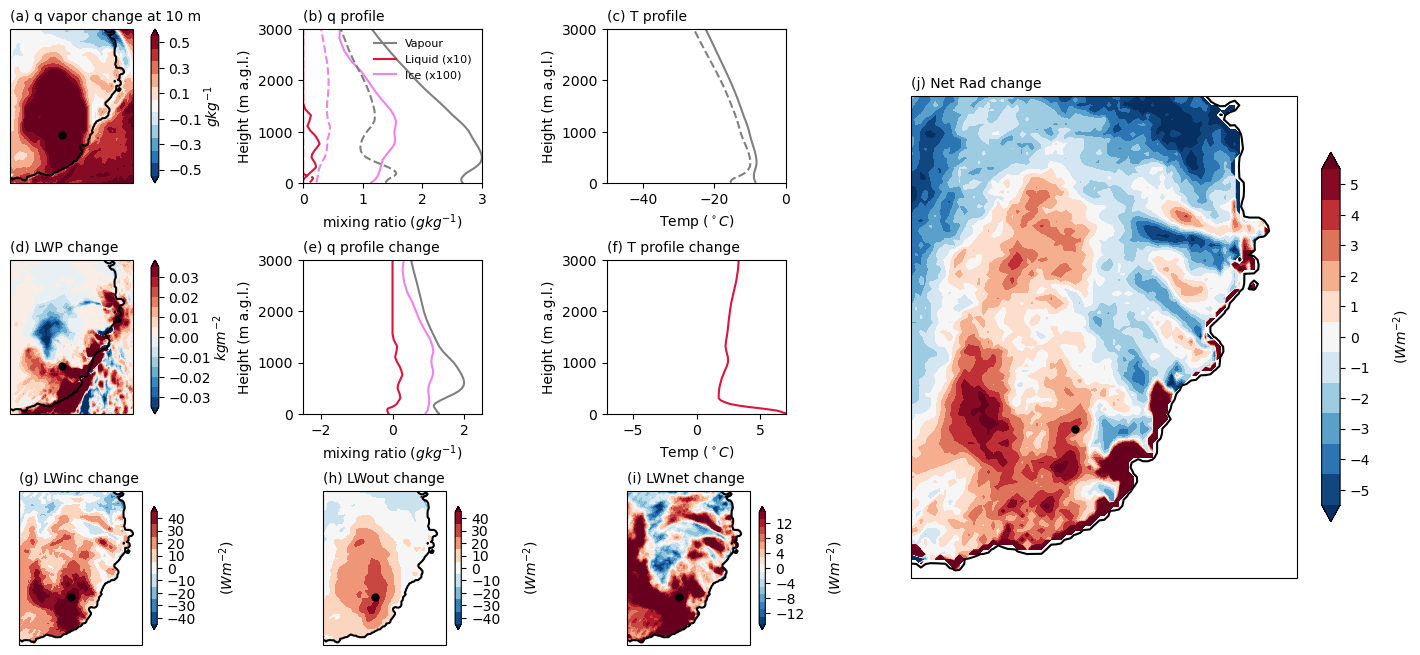

In [5]:
#############################################
# Plot terrein map
#############################################

min_height = 10
#time_ini = 39
time_ix = 0
  
####################
### Plot DRIVERS ###
#Figure and axis
fig = plt.figure(figsize=[18,8])
spec = gridspec.GridSpec(ncols=5, nrows=3, figure=fig, hspace= 0.5, wspace=0.7)

### Background
ax1 = fig.add_subplot(spec[0, 0], projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, 0], projection=ccrs.SouthPolarStereo())
ax5 = fig.add_subplot(spec[1, 1])
ax6 = fig.add_subplot(spec[1, 2])
ax7 = fig.add_subplot(spec[2, 0], projection=ccrs.SouthPolarStereo())
ax8 = fig.add_subplot(spec[2, 1], projection=ccrs.SouthPolarStereo())
ax9 = fig.add_subplot(spec[2, 2], projection=ccrs.SouthPolarStereo())
ax10 = fig.add_subplot(spec[:, 3:], projection=ccrs.SouthPolarStereo())

################################
### Plot Water and Cloud Vapor
### Vapor Map
CS1 = ax1.contourf((wrf.to_np(qvapor_50m_ssp585[tini:tend,:,:].mean(axis=0)) - wrf.to_np(qvapor_50m_hist[tini:tend,:,:].mean(axis=0)))*1000, np.arange(-0.55,0.56,0.1), cmap='RdBu_r', extend="both")
#CS1 = ax1.contourf((wrf.to_np(pw_ant_ssp585[tini:tend,:,:].mean(axis=0)) - wrf.to_np(pw_ant_hist[tini:tend,:,:].mean(axis=0))), np.arange(-2,2,0.2), cmap='RdBu_r', extend="both")
cbar_1 = fig.colorbar(CS1, ax=ax1, orientation = 'vertical', pad=0.1)
cbar_1.set_label('$g kg^{-1}$', labelpad=0, fontsize=10)
cbar_1.set_ticks(np.arange(-0.5,0.6,0.2))


### Cloud Map
#CS4 = ax4.contourf((wrf.to_np(qcloud_200m_ssp585[tini:tend,:,:].mean(axis=0)) - wrf.to_np(qcloud_200m_hist[tini:tend,:,:].mean(axis=0)))*1000, np.arange(-0.055,0.056,0.01), cmap='RdBu_r', extend="both")
CS4 = ax4.contourf((wrf.to_np(lwp_ant_ssp585[tini:tend,:,:].mean(axis=0)) - wrf.to_np(lwp_ant_hist[tini:tend,:,:].mean(axis=0))), np.arange(-0.035,0.036,0.005), cmap='RdBu_r', extend="both")
cbar_4 = fig.colorbar(CS4, ax=ax4, orientation = 'vertical', pad=0.1)
cbar_4.set_label('$kg m^{-2}$', labelpad=0, fontsize=10)
cbar_4.set_ticks(np.arange(-0.03,0.031,0.01))


################################
### Plot Concordia Profiles
#Concordia absolute values q profile
#ax2b = ax2.twiny()
ax2.plot(wrf.to_np(qvapor_ant_ssp585[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*1000, Z_ant_ssp585_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Grey', label='Vapour')
ax2.plot(wrf.to_np(qcloud_ant_ssp585[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*10000, Z_ant_ssp585_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Crimson', label='Liquid (x10)')
ax2.plot(wrf.to_np(qice_ant_ssp585[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*100000, Z_ant_ssp585_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Violet', label='Ice (x100)')
ax2.plot(wrf.to_np(qvapor_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*1000, Z_ant_ssp585_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, '--', c='Grey')
ax2.plot(wrf.to_np(qcloud_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*10000, Z_ant_ssp585_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, '--', c='Crimson')
ax2.plot(wrf.to_np(qice_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0))*100000, Z_ant_ssp585_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, '--', c='Violet')
ax2.legend(frameon=False, fontsize=8)

#Concordia changes q profile
#ax5b = ax5.twiny()
ax5.plot((wrf.to_np(qvapor_ant_ssp585[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0)-wrf.to_np(qvapor_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0))*1000, Z_ant_ssp585_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Grey')
ax5.plot((wrf.to_np(qcloud_ant_ssp585[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0)-wrf.to_np(qcloud_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0))*10000, Z_ant_ssp585_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Crimson')
ax5.plot((wrf.to_np(qice_ant_ssp585[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0)-wrf.to_np(qice_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0))*100000, Z_ant_ssp585_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Violet')

#Concordia absolute values T profile
ax3.plot(wrf.to_np(T_ant_ssp585[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0)) - 273.15, Z_ant_ssp585_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Grey', label='Temperature')
ax3.plot(wrf.to_np(T_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]].mean(axis=0)) - 273.15, Z_ant_ssp585_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, '--', c='Grey', label='Temperature preindustrial')

#Concordia absolute values T
ax6.plot(wrf.to_np(T_ant_ssp585[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0) - wrf.to_np(T_ant_hist[tini:tend,:,CON_xy[1],CON_xy[0]]).mean(axis=0), Z_ant_ssp585_unstg[0,:,CON_xy[1],CON_xy[0]] - height[CON_xy[1],CON_xy[0]].values, c='Crimson', label='vapour')


################################
### Plot Radiation
E_LWINC_ssp585_event_mean = wrf.to_np(E_LWINC_ssp585[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_LWOUT_ssp585_event_mean = wrf.to_np(-E_LWOUT_ssp585[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SWINC_ssp585_event_mean = wrf.to_np(E_SWINC_ssp585[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SWOUT_ssp585_event_mean = wrf.to_np(-E_SWOUT_ssp585[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SENSH_ssp585_event_mean = wrf.to_np(E_SENSH_ssp585[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_LATEH_ssp585_event_mean = wrf.to_np(E_LATEH_ssp585[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_TOTAL_ssp585_event_mean = wrf.to_np(E_TOTAL_ssp585[tini:tend,:,:].where(height > min_height)).mean(axis=0)

E_LWINC_hist_event_mean = wrf.to_np(E_LWINC_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_LWOUT_hist_event_mean = wrf.to_np(-E_LWOUT_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SWINC_hist_event_mean = wrf.to_np(E_SWINC_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SWOUT_hist_event_mean = wrf.to_np(-E_SWOUT_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_SENSH_hist_event_mean = wrf.to_np(E_SENSH_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_LATEH_hist_event_mean = wrf.to_np(E_LATEH_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)
E_TOTAL_hist_event_mean = wrf.to_np(E_TOTAL_hist[tini:tend,:,:].where(height > min_height)).mean(axis=0)

fill7 = ax7.contourf(E_LWINC_ssp585_event_mean - E_LWINC_hist_event_mean, np.arange(-45,45.1,10), cmap='RdBu_r', extend="both")
fill8 = ax8.contourf(E_LWOUT_ssp585_event_mean - E_LWOUT_hist_event_mean, np.arange(-45,45.1,10), cmap='RdBu_r', extend="both")
fill9 = ax9.contourf((E_LWINC_ssp585_event_mean - E_LWINC_hist_event_mean) - (E_LWOUT_ssp585_event_mean - E_LWOUT_hist_event_mean), np.arange(-15,15.1,2), cmap='RdBu_r', extend="both")
fill10= ax10.contourf(E_TOTAL_ssp585_event_mean - E_TOTAL_hist_event_mean, np.arange(-5.5,5.6,1), cmap='RdBu_r', extend="both")

cbar7 = plt.colorbar(fill7, shrink=0.8, ax=ax7); cbar7.set_label('($Wm^{-2}$)', labelpad=15, fontsize=10); cbar7.set_ticks(np.arange(-40,40.1,10))
cbar8 = plt.colorbar(fill8, shrink=0.8, ax=ax8); cbar8.set_label('($Wm^{-2}$)', labelpad=15, fontsize=10); cbar8.set_ticks(np.arange(-40,40.1,10))
cbar9 = plt.colorbar(fill9, shrink=0.8, ax=ax9); cbar9.set_label('($Wm^{-2}$)', labelpad=15, fontsize=10); cbar9.set_ticks(np.arange(-12,12.1,4))
cbar10 = plt.colorbar(fill10, shrink=0.6, ax=ax10); cbar10.set_label('($Wm^{-2}$)', labelpad=15, fontsize=10); cbar10.set_ticks(np.arange(-5,5.1,1))

##############################
## Plot parameters profiles ##
ax2.set_ylabel('Height (m a.g.l.)', fontsize=10)
ax3.set_ylabel('Height (m a.g.l.)', fontsize=10)
ax5.set_ylabel('Height (m a.g.l.)', fontsize=10)
ax6.set_ylabel('Height (m a.g.l.)', fontsize=10)
ax2.set_xlabel('mixing ratio ($g kg^{-1}$)', fontsize=10)
#ax2b.set_xlabel('q cloud ($g kg^{-1})$)', fontsize=10)
ax5.set_xlabel('mixing ratio ($g kg^{-1}$)', fontsize=10)
#ax5b.set_xlabel('q cloud change ($g kg^{-1})$)', fontsize=10)
ax3.set_xlabel('Temp ($^\circ C$)', fontsize=10)
ax6.set_xlabel('Temp ($^\circ C$)', fontsize=10)
ax2.set_xlim(0, 3)
#ax2b.set_xlim(0, 0.3)
ax5.set_xlim(-2.5, 2.5)
#ax5b.set_xlim(-0.15, 0.15)
ax3.set_xlim(-50, 0)
ax6.set_xlim(-7, 7)

ax2.set_ylim(0, 3000)
ax3.set_ylim(0, 3000)
ax5.set_ylim(0, 3000)
ax6.set_ylim(0, 3000)


##########################
## Plot parameters maps ##
for ax in [ax1, ax4, ax7, ax8, ax9, ax10]:
    ax.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
    ax.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)
    ax.set_extent([140, 220, 30, 130], crs=ccrs.SouthPolarStereo())

ax1.set_title('(a) q vapor change at 10 m', loc='left', fontsize=10)
ax2.set_title('(b) q profile', loc='left', fontsize=10)
ax3.set_title('(c) T profile', loc='left', fontsize=10)
ax4.set_title('(d) LWP change', loc='left', fontsize=10)
ax5.set_title('(e) q profile change', loc='left', fontsize=10)
ax6.set_title('(f) T profile change', loc='left', fontsize=10)
ax7.set_title('(g) LWinc change', loc='left', fontsize=10)
ax8.set_title('(h) LWout change', loc='left', fontsize=10)
ax9.set_title('(i) LWnet change', loc='left', fontsize=10)
ax10.set_title('(j) Net Rad change', loc='left', fontsize=10)


plt.plot()

[]

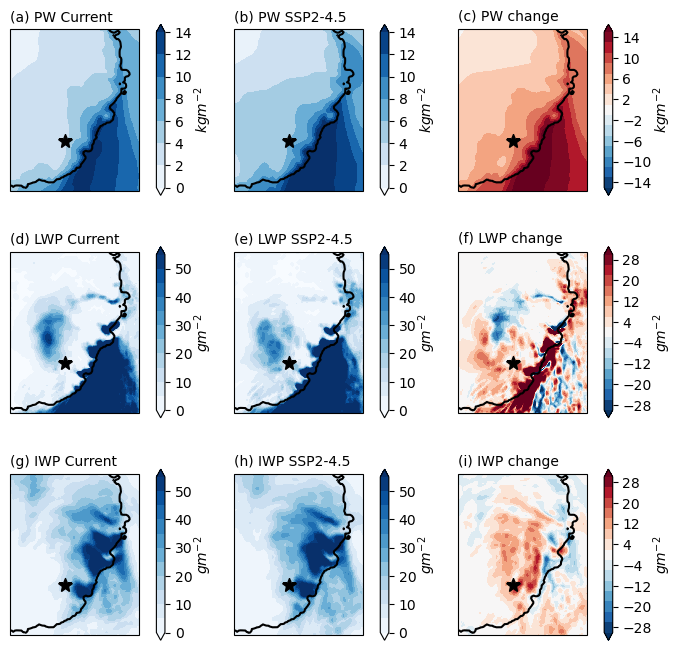

In [6]:
#############################################
# Plot terrein map
#############################################

min_height = 10
#time_ini = 39
time_ix = 0
  
####################
### Plot DRIVERS ###
#Figure and axis
fig = plt.figure(figsize=[8,8])
spec = gridspec.GridSpec(ncols=3, nrows=3, figure=fig, hspace= 0.3, wspace=0.3)

### Background
ax1 = fig.add_subplot(spec[0, 0], projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(spec[0, 1], projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(spec[0, 2], projection=ccrs.SouthPolarStereo())
ax4 = fig.add_subplot(spec[1, 0], projection=ccrs.SouthPolarStereo())
ax5 = fig.add_subplot(spec[1, 1], projection=ccrs.SouthPolarStereo())
ax6 = fig.add_subplot(spec[1, 2], projection=ccrs.SouthPolarStereo())
ax7 = fig.add_subplot(spec[2, 0], projection=ccrs.SouthPolarStereo())
ax8 = fig.add_subplot(spec[2, 1], projection=ccrs.SouthPolarStereo())
ax9 = fig.add_subplot(spec[2, 2], projection=ccrs.SouthPolarStereo())

################################
### Plot Water and Cloud Vapor
### Liquid Map Past
CS1 = ax1.contourf(wrf.to_np(pw_ant_hist[tini:tend,:,:].mean(axis=0)), np.arange(0,15,2), cmap='Blues', extend="both")
cbar_1 = fig.colorbar(CS1, ax=ax1, orientation = 'vertical', pad=0.1)
cbar_1.set_label('$kg m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Hist
CS2 = ax2.contourf(wrf.to_np(pw_ant_ssp245[tini:tend,:,:].mean(axis=0)), np.arange(0,15,2), cmap='Blues', extend="both")
cbar_2 = fig.colorbar(CS2, ax=ax2, orientation = 'vertical', pad=0.1)
cbar_2.set_label('$kg m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Change
CS3 = ax3.contourf((wrf.to_np(pw_ant_ssp245[tini:tend,:,:].mean(axis=0)) - wrf.to_np(lwp_ant_hist[tini:tend,:,:].mean(axis=0))), np.arange(-15,16,2), cmap='RdBu_r', extend="both")
cbar_3 = fig.colorbar(CS3, ax=ax3, orientation = 'vertical', pad=0.1)
cbar_3.set_label('$kg m^{-2}$', labelpad=0, fontsize=10)
cbar_3.set_ticks(np.arange(-14,15,4))

### Liquid Map Past
CS4 = ax4.contourf(wrf.to_np(lwp_ant_hist[tini:tend,:,:].mean(axis=0))*1000, np.arange(0,60,5), cmap='Blues', extend="both")
cbar_4 = fig.colorbar(CS4, ax=ax4, orientation = 'vertical', pad=0.1)
cbar_4.set_label('$g m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Hist
CS5 = ax5.contourf(wrf.to_np(lwp_ant_ssp245[tini:tend,:,:].mean(axis=0))*1000, np.arange(0,60,5), cmap='Blues', extend="both")
cbar_5 = fig.colorbar(CS5, ax=ax5, orientation = 'vertical', pad=0.1)
cbar_5.set_label('$g m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Change
CS6 = ax6.contourf((wrf.to_np(lwp_ant_ssp245[tini:tend,:,:].mean(axis=0)) - wrf.to_np(lwp_ant_hist[tini:tend,:,:].mean(axis=0)))*1000, np.arange(-30,31,4), cmap='RdBu_r', extend="both")
cbar_6 = fig.colorbar(CS6, ax=ax6, orientation = 'vertical', pad=0.1)
cbar_6.set_label('$g m^{-2}$', labelpad=0, fontsize=10)
cbar_6.set_ticks(np.arange(-28,29,8))

### Liquid Map Past
CS7 = ax7.contourf(wrf.to_np(iwp_ant_hist[tini:tend,:,:].mean(axis=0))*1000, np.arange(0,60,5), cmap='Blues', extend="both")
cbar_7 = fig.colorbar(CS7, ax=ax7, orientation = 'vertical', pad=0.1)
cbar_7.set_label('$g m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Hist
CS8 = ax8.contourf(wrf.to_np(iwp_ant_ssp245[tini:tend,:,:].mean(axis=0))*1000, np.arange(0,60,5), cmap='Blues', extend="both")
cbar_8 = fig.colorbar(CS8, ax=ax8, orientation = 'vertical', pad=0.1)
cbar_8.set_label('$g m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Change
CS9 = ax9.contourf((wrf.to_np(iwp_ant_ssp245[tini:tend,:,:].mean(axis=0)) - wrf.to_np(iwp_ant_hist[tini:tend,:,:].mean(axis=0)))*1000, np.arange(-30,31,4), cmap='RdBu_r', extend="both")
cbar_9 = fig.colorbar(CS9, ax=ax9, orientation = 'vertical', pad=0.1)
cbar_9.set_label('$g m^{-2}$', labelpad=0, fontsize=10)
cbar_9.set_ticks(np.arange(-28,29,8))


##########################
## Plot parameters maps ##
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    ax.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
    ax.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k*', markersize=10)
    ax.set_extent([140, 220, 30, 130], crs=ccrs.SouthPolarStereo())

ax1.set_title('(a) PW Current', loc='left', fontsize=10)
ax2.set_title('(b) PW SSP2-4.5', loc='left', fontsize=10)
ax3.set_title('(c) PW change', loc='left', fontsize=10)
ax4.set_title('(d) LWP Current', loc='left', fontsize=10)
ax5.set_title('(e) LWP SSP2-4.5', loc='left', fontsize=10)
ax6.set_title('(f) LWP change', loc='left', fontsize=10)
ax7.set_title('(g) IWP Current', loc='left', fontsize=10)
ax8.set_title('(h) IWP SSP2-4.5', loc='left', fontsize=10)
ax9.set_title('(i) IWP change', loc='left', fontsize=10)

plt.plot()

[]

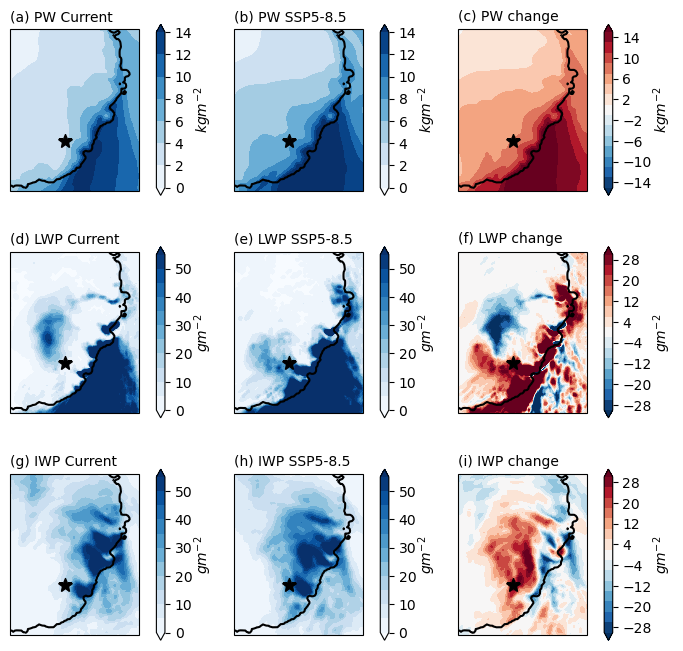

In [7]:
#############################################
# Plot terrein map
#############################################

min_height = 10
#time_ini = 39
time_ix = 0
  
####################
### Plot DRIVERS ###
#Figure and axis
fig = plt.figure(figsize=[8,8])
spec = gridspec.GridSpec(ncols=3, nrows=3, figure=fig, hspace= 0.3, wspace=0.3)

### Background
ax1 = fig.add_subplot(spec[0, 0], projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(spec[0, 1], projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(spec[0, 2], projection=ccrs.SouthPolarStereo())
ax4 = fig.add_subplot(spec[1, 0], projection=ccrs.SouthPolarStereo())
ax5 = fig.add_subplot(spec[1, 1], projection=ccrs.SouthPolarStereo())
ax6 = fig.add_subplot(spec[1, 2], projection=ccrs.SouthPolarStereo())
ax7 = fig.add_subplot(spec[2, 0], projection=ccrs.SouthPolarStereo())
ax8 = fig.add_subplot(spec[2, 1], projection=ccrs.SouthPolarStereo())
ax9 = fig.add_subplot(spec[2, 2], projection=ccrs.SouthPolarStereo())

################################
### Plot Water and Cloud Vapor
### Liquid Map Past
CS1 = ax1.contourf(wrf.to_np(pw_ant_hist[tini:tend,:,:].mean(axis=0)), np.arange(0,15,2), cmap='Blues', extend="both")
cbar_1 = fig.colorbar(CS1, ax=ax1, orientation = 'vertical', pad=0.1)
cbar_1.set_label('$kg m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Hist
CS2 = ax2.contourf(wrf.to_np(pw_ant_ssp585[tini:tend,:,:].mean(axis=0)), np.arange(0,15,2), cmap='Blues', extend="both")
cbar_2 = fig.colorbar(CS2, ax=ax2, orientation = 'vertical', pad=0.1)
cbar_2.set_label('$kg m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Change
CS3 = ax3.contourf((wrf.to_np(pw_ant_ssp585[tini:tend,:,:].mean(axis=0)) - wrf.to_np(lwp_ant_hist[tini:tend,:,:].mean(axis=0))), np.arange(-15,16,2), cmap='RdBu_r', extend="both")
cbar_3 = fig.colorbar(CS3, ax=ax3, orientation = 'vertical', pad=0.1)
cbar_3.set_label('$kg m^{-2}$', labelpad=0, fontsize=10)
cbar_3.set_ticks(np.arange(-14,15,4))

### Liquid Map Past
CS4 = ax4.contourf(wrf.to_np(lwp_ant_hist[tini:tend,:,:].mean(axis=0))*1000, np.arange(0,60,5), cmap='Blues', extend="both")
cbar_4 = fig.colorbar(CS4, ax=ax4, orientation = 'vertical', pad=0.1)
cbar_4.set_label('$g m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Hist
CS5 = ax5.contourf(wrf.to_np(lwp_ant_ssp585[tini:tend,:,:].mean(axis=0))*1000, np.arange(0,60,5), cmap='Blues', extend="both")
cbar_5 = fig.colorbar(CS5, ax=ax5, orientation = 'vertical', pad=0.1)
cbar_5.set_label('$g m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Change
CS6 = ax6.contourf((wrf.to_np(lwp_ant_ssp585[tini:tend,:,:].mean(axis=0)) - wrf.to_np(lwp_ant_hist[tini:tend,:,:].mean(axis=0)))*1000, np.arange(-30,31,4), cmap='RdBu_r', extend="both")
cbar_6 = fig.colorbar(CS6, ax=ax6, orientation = 'vertical', pad=0.1)
cbar_6.set_label('$g m^{-2}$', labelpad=0, fontsize=10)
cbar_6.set_ticks(np.arange(-28,29,8))

### Liquid Map Past
CS7 = ax7.contourf(wrf.to_np(iwp_ant_hist[tini:tend,:,:].mean(axis=0))*1000, np.arange(0,60,5), cmap='Blues', extend="both")
cbar_7 = fig.colorbar(CS7, ax=ax7, orientation = 'vertical', pad=0.1)
cbar_7.set_label('$g m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Hist
CS8 = ax8.contourf(wrf.to_np(iwp_ant_ssp585[tini:tend,:,:].mean(axis=0))*1000, np.arange(0,60,5), cmap='Blues', extend="both")
cbar_8 = fig.colorbar(CS8, ax=ax8, orientation = 'vertical', pad=0.1)
cbar_8.set_label('$g m^{-2}$', labelpad=0, fontsize=10)

### Liquid Map Change
CS9 = ax9.contourf((wrf.to_np(iwp_ant_ssp585[tini:tend,:,:].mean(axis=0)) - wrf.to_np(iwp_ant_hist[tini:tend,:,:].mean(axis=0)))*1000, np.arange(-30,31,4), cmap='RdBu_r', extend="both")
cbar_9 = fig.colorbar(CS9, ax=ax9, orientation = 'vertical', pad=0.1)
cbar_9.set_label('$g m^{-2}$', labelpad=0, fontsize=10)
cbar_9.set_ticks(np.arange(-28,29,8))


##########################
## Plot parameters maps ##
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    ax.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
    ax.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k*', markersize=10)
    ax.set_extent([140, 220, 30, 130], crs=ccrs.SouthPolarStereo())

ax1.set_title('(a) PW Current', loc='left', fontsize=10)
ax2.set_title('(b) PW SSP5-8.5', loc='left', fontsize=10)
ax3.set_title('(c) PW change', loc='left', fontsize=10)
ax4.set_title('(d) LWP Current', loc='left', fontsize=10)
ax5.set_title('(e) LWP SSP5-8.5', loc='left', fontsize=10)
ax6.set_title('(f) LWP change', loc='left', fontsize=10)
ax7.set_title('(g) IWP Current', loc='left', fontsize=10)
ax8.set_title('(h) IWP SSP5-8.5', loc='left', fontsize=10)
ax9.set_title('(i) IWP change', loc='left', fontsize=10)

plt.plot()